# EDAMI project
## Mining association rules with dEclat algorithm

Authors:
- Robert Wojtaś
- Jakub Sikora

#### Load modules

In [5]:
from Transactional import read_csv
from dEclat import dEclat, dEclatControl
from dEclat.Rules import rulesInduction, InductionControl

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import time
%matplotlib inline

#### Read data from .csv file and convert it to transactional format

In [3]:
db = read_csv("./data/mushrooms.csv")

### Generate frequent itemsets and associations rules

#### Mine frequent itemsets with dEclat algorithm

In [4]:
DE_params = dEclatControl(support=0.5, minlen=1, maxlen=10)
frequentItemsets = dEclat(db, DE_params)

#### Induce rules from frequent itemsets

In [5]:
RI_params = InductionControl(confidence=0.5)
ruleset = rulesInduction(frequentItemsets, db, RI_params)

#### Convert ruleset to pandas data frame

In [6]:
df = ruleset.as_data_frame()
df

,lhs,rhs,support,confidence,lift
0,[gill-attachment=FREE],[class=EDIBLE],0.510456,0.523902,0.982434
1,[class=EDIBLE],[gill-attachment=FREE],0.510456,0.957219,0.982434
2,[veil-type=PARTIAL],[class=EDIBLE],0.533270,0.533270,1.000000
3,[class=EDIBLE],[veil-type=PARTIAL],0.533270,1.000000,1.000000
4,[veil-color=WHITE],[class=EDIBLE],0.510456,0.522882,0.980521
...,...,...,...,...,...
458,"[stalk-color-below-ring=WHITE, veil-color=WHITE]",[veil-type=PARTIAL],0.551331,1.000000,1.000000
459,"[stalk-color-below-ring=WHITE, veil-type=PARTIAL]",[veil-color=WHITE],0.551331,1.000000,1.024343
460,"[veil-color=WHITE, ring-number=ONE]",[veil-type=PARTIAL],0.899240,1.000000,1.000000
461,"[veil-type=PARTIAL, ring-number=ONE]",[veil-color=WHITE],0.899240,0.974253,0.997969


In [7]:
df.describe()

,support,confidence,lift
count,463.000000,463.000000,463.000000
mean,0.600377,0.866897,1.006129
std,0.111489,0.164156,0.039924
min,0.500000,0.522882,0.931757
25%,0.528042,0.690732,0.988002
50%,0.563688,0.957968,1.000000
75%,0.608840,1.000000,1.024343
max,0.976236,1.000000,1.318040


### Rules visualization

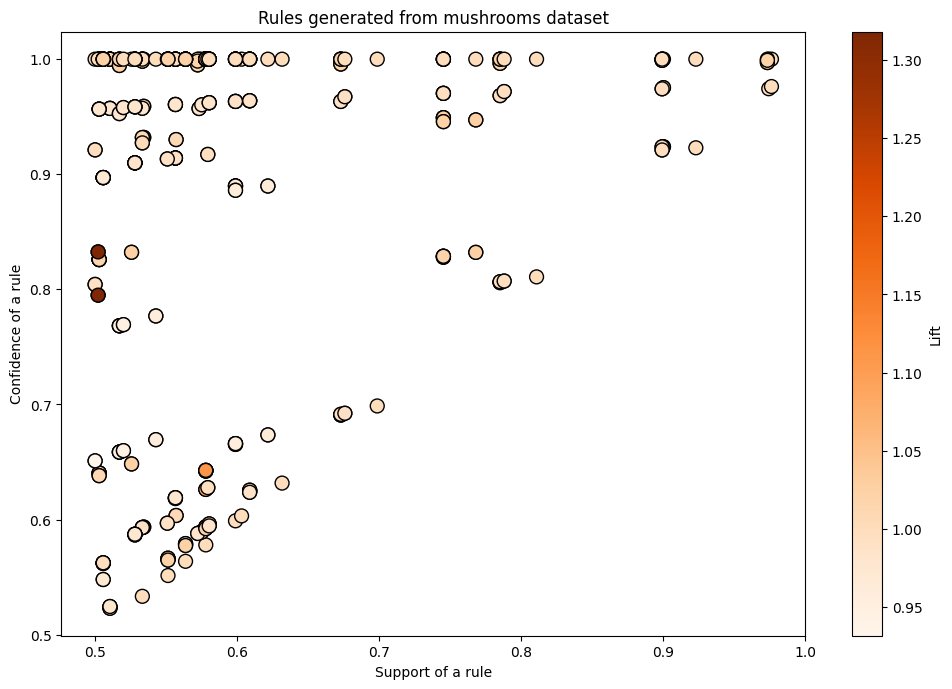

In [8]:
fig = plt.figure(figsize=(12,8), dpi=100)
sc = plt.scatter(df["support"], df["confidence"], c=df["lift"], cmap="Oranges", s=100, edgecolors="black")
bar = fig.colorbar(sc, label='Lift')
plt.title("Rules generated from mushrooms dataset")
plt.xlabel("Support of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

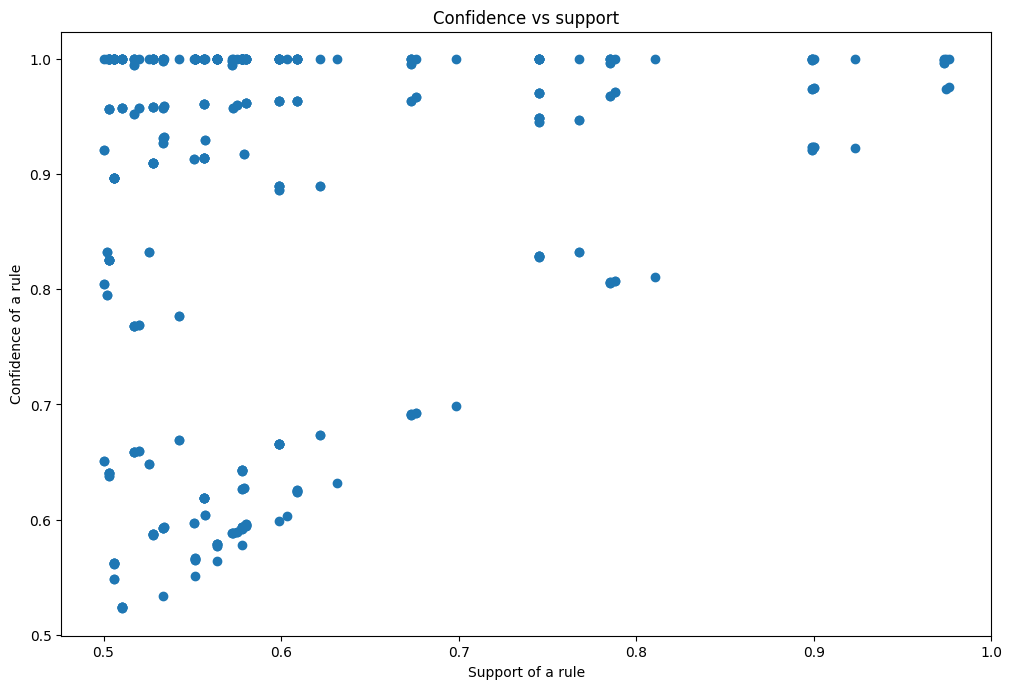

In [9]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["support"], df["confidence"])
plt.title("Confidence vs support")
plt.xlabel("Support of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

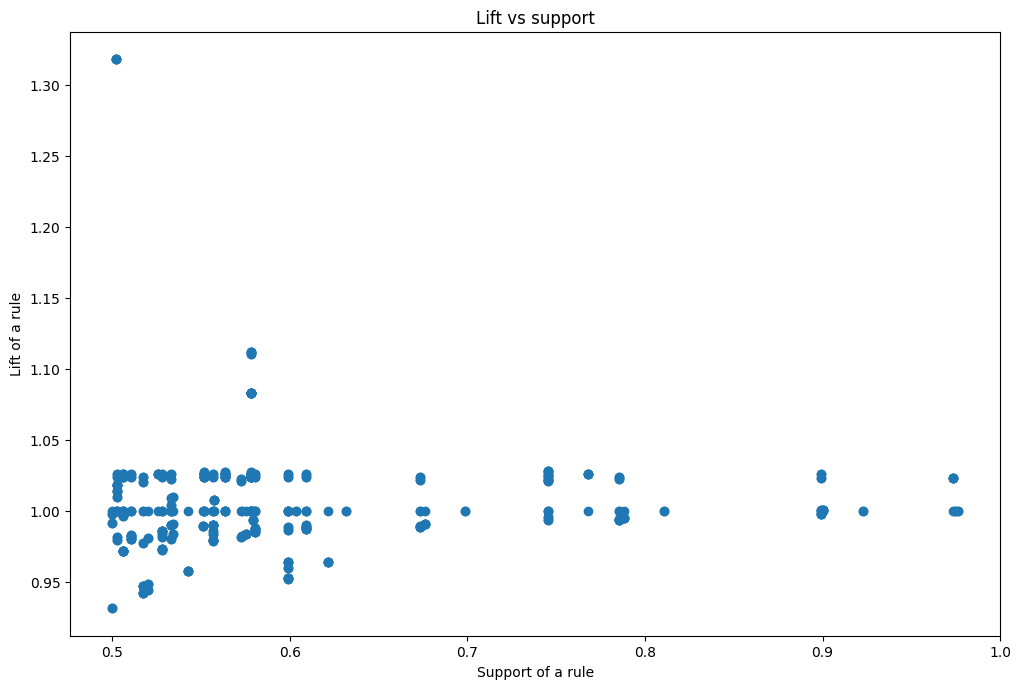

In [10]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["support"], df["lift"])
plt.title("Lift vs support")
plt.xlabel("Support of a rule")
plt.ylabel("Lift of a rule")
plt.show()

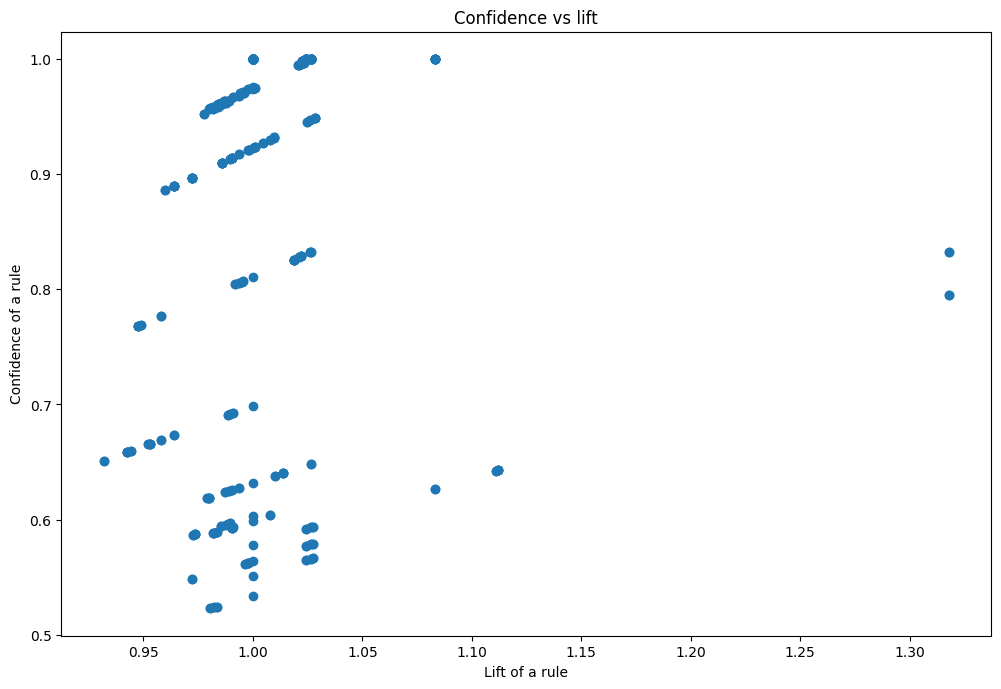

In [11]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(df["lift"], df["confidence"])
plt.title("Confidence vs lift")
plt.xlabel("Lift of a rule")
plt.ylabel("Confidence of a rule")
plt.show()

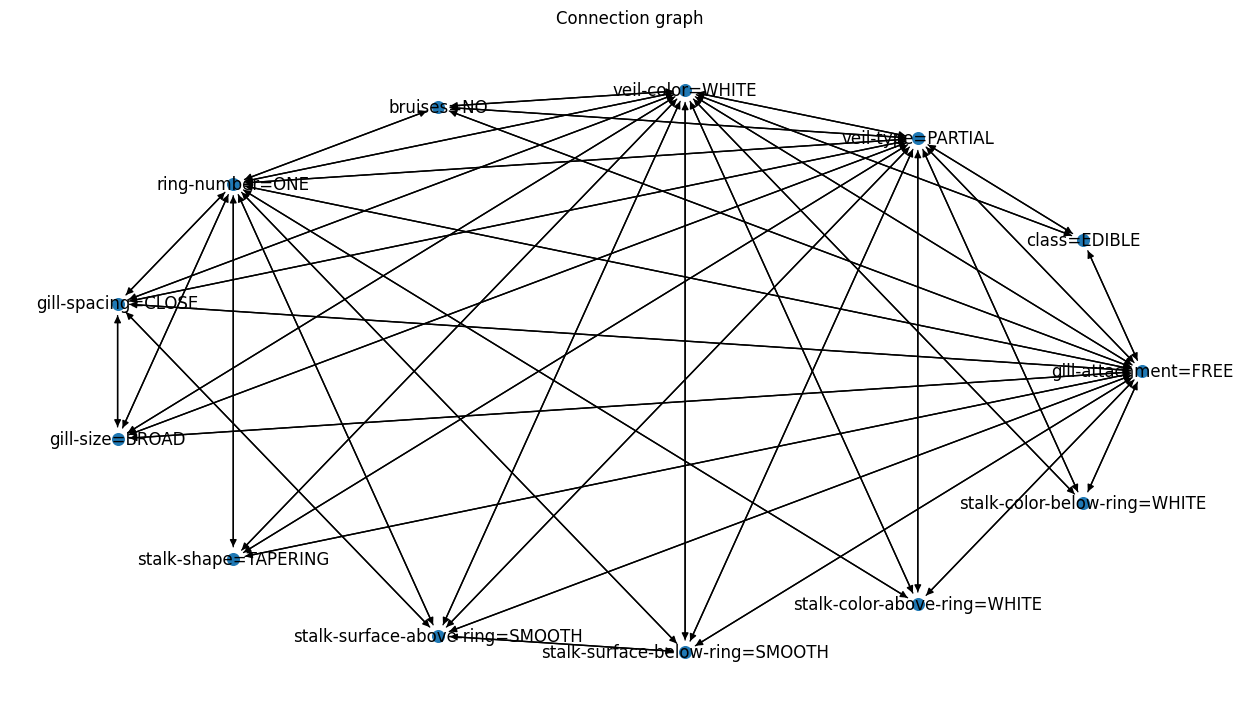

In [13]:
fig = plt.figure(figsize=(16, 9), dpi=100)
G = nx.DiGraph()

for (idx, row) in df.iterrows():
    lhs = str(row.lhs).replace("[", "").replace("]", "").split(", ")
    rhs = str(row.rhs).replace("[", "").replace("]", "")
    for l in lhs:
        G.add_edge(l, rhs)
    
pos = nx.circular_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=70)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Connection graph")
plt.axis("off")
plt.show()

### Performance scores

#### Number of found frequent itemsets and time of calculations based on minimal support

In [20]:
import time

min_supports = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
fis = []
times = []

for supp in min_supports:
    print(f"Current minimal support = {supp}")
    
    start = time.time()
    DE_params = dEclatControl(support=supp, minlen=1, maxlen=10)
    frequentItemsets = dEclat(db, DE_params)
    end = time.time()

    fis.append(len(frequentItemsets))
    times.append(end - start)

Current minimal support = 0.4
Current minimal support = 0.45
Current minimal support = 0.5
Current minimal support = 0.55
Current minimal support = 0.6
Current minimal support = 0.65
Current minimal support = 0.7
Current minimal support = 0.75
Current minimal support = 0.8
Current minimal support = 0.85
Current minimal support = 0.9
Current minimal support = 0.95
Current minimal support = 1.0


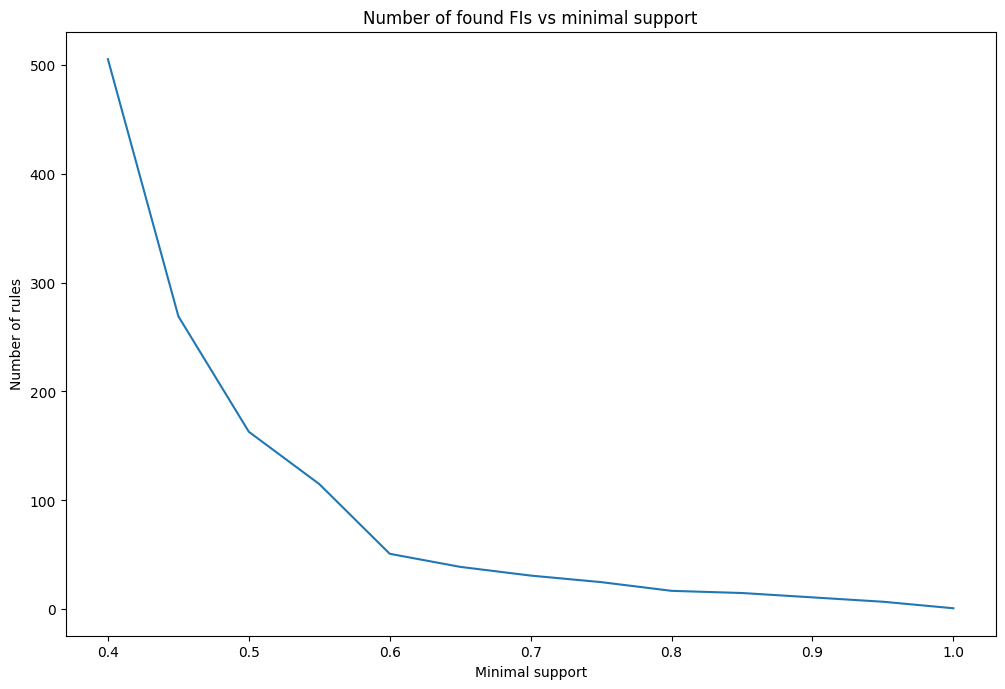

In [24]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.plot(min_supports, fis)
plt.title("Number of found FIs vs minimal support")
plt.xlabel("Minimal support")
plt.ylabel("Number of rules")
plt.show()

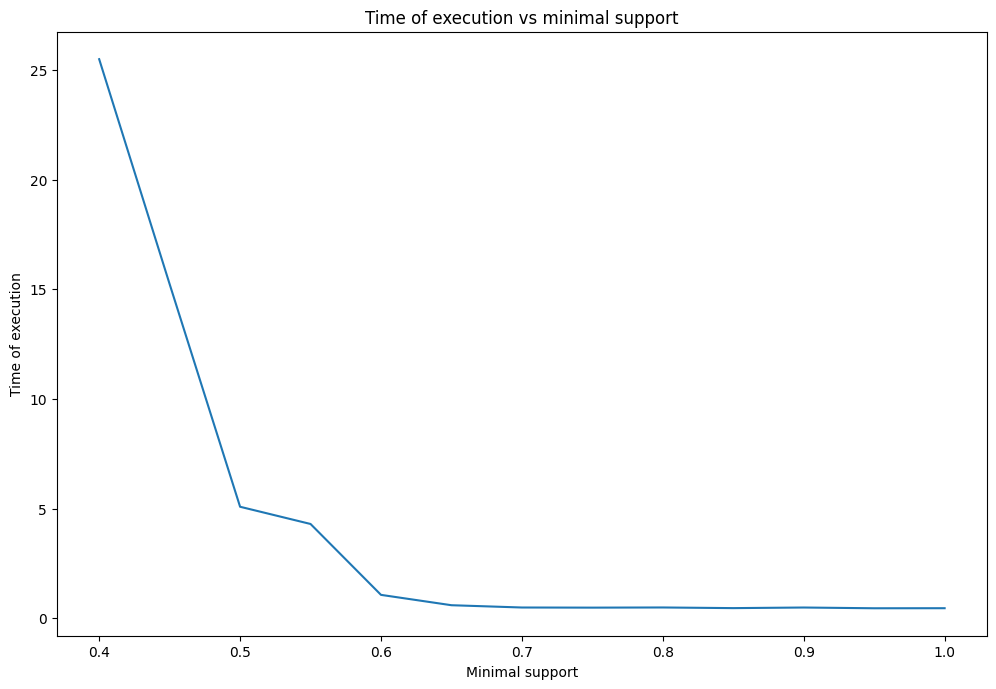

In [23]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.plot(min_supports, times)
plt.title("Time of execution vs minimal support")
plt.xlabel("Minimal support")
plt.ylabel("Time of execution")
plt.show()

## Extension

Initial sorting in ascending order is known to decrease computation time. We have added this sorting behaviour into our solution. Turning sorting on is done by setting parameter `sort` in `dEclatParams` object

In [12]:
min_supports = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

times = []
times_with_sorting = []

for supp in min_supports:
    print(f"Current minimal support = {supp}")
    
    DE_params = dEclatControl(support=supp, minlen=1, maxlen=10)
    start = time.time()
    frequentItemsets = dEclat(db, DE_params)
    end = time.time()
    times.append(end - start)
    
    DE_params_with_sorting = dEclatControl(support=supp, minlen=1, maxlen=10, sort=True)
    start = time.time()
    frequentItemsets = dEclat(db, DE_params_with_sorting)
    end = time.time()
    times_with_sorting.append(end - start)

Current minimal support = 0.4
Current minimal support = 0.45
Current minimal support = 0.5
Current minimal support = 0.55
Current minimal support = 0.6
Current minimal support = 0.65
Current minimal support = 0.7
Current minimal support = 0.75
Current minimal support = 0.8
Current minimal support = 0.85
Current minimal support = 0.9
Current minimal support = 0.95
Current minimal support = 1.0


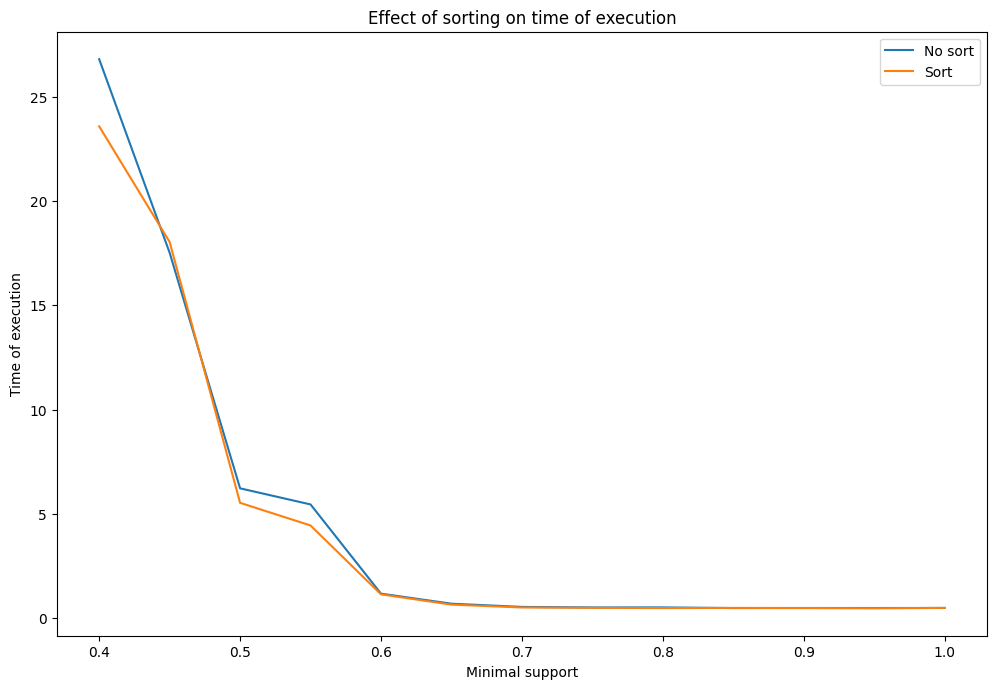

In [14]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.plot(min_supports, times, label="No sort")
plt.plot(min_supports, times_with_sorting, label="Sort")
plt.legend()
plt.title("Effect of sorting on time of execution")
plt.xlabel("Minimal support")
plt.ylabel("Time of execution")
plt.savefig("./sorting-simple.pdf")

We might want to compare this result with worst-case scenario, when initial one-item itemsets are sorted in descending order (based on support). We have implemented this behaviour to show the difference.

In [15]:
times_with_reverse_sorting = []
for supp in min_supports:
    print(f"Current minimal support = {supp}")
    
    DE_params_with_reverse_sorting = dEclatControl(support=supp, minlen=1, maxlen=10, sort_reverse=True)
    start = time.time()
    frequentItemsets = dEclat(db, DE_params_with_reverse_sorting)
    end = time.time()
    times_with_reverse_sorting.append(end - start)

Current minimal support = 0.4
Current minimal support = 0.45
Current minimal support = 0.5
Current minimal support = 0.55
Current minimal support = 0.6
Current minimal support = 0.65
Current minimal support = 0.7
Current minimal support = 0.75
Current minimal support = 0.8
Current minimal support = 0.85
Current minimal support = 0.9
Current minimal support = 0.95
Current minimal support = 1.0


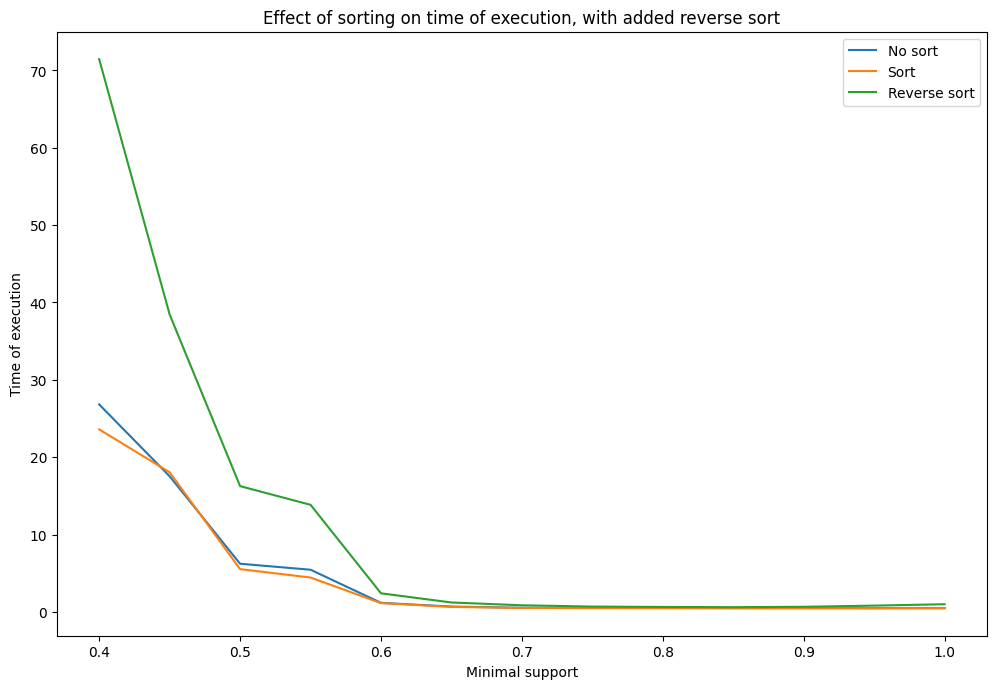

In [16]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.plot(min_supports, times, label="No sort")
plt.plot(min_supports, times_with_sorting, label="Sort")
plt.plot(min_supports, times_with_reverse_sorting, label="Reverse sort")
plt.legend()
plt.title("Effect of sorting on time of execution, with added reverse sort")
plt.xlabel("Minimal support")
plt.ylabel("Time of execution")
plt.savefig("./sorting-reverse.pdf")